<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [19]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [21]:
# Read the CSV file
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')

# Display the first few rows of the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [7]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [9]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [11]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [13]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [15]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [22]:
df['CompTotal'].unique()

array([     nan, 2040000.,   28000., ...,  254600.,  247433.,   77700.])

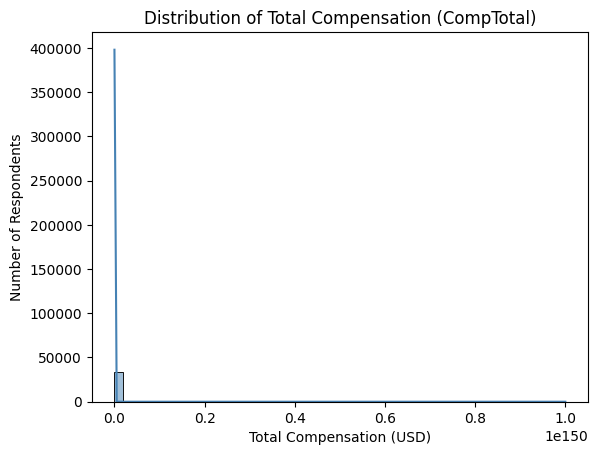

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram with KDE
sns.histplot(df['CompTotal'], bins=50, kde=True, color='steelblue')

plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.show()

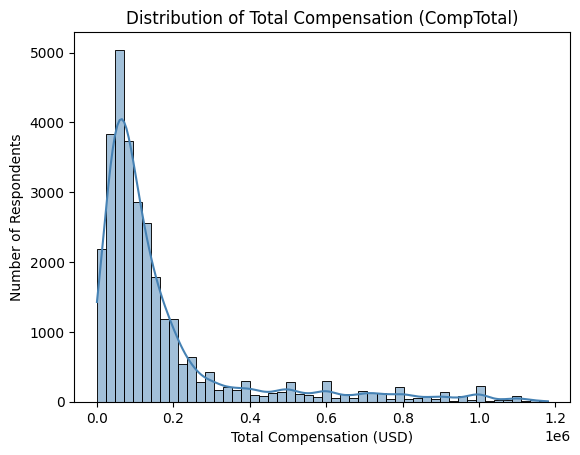

In [31]:
# Filter out extreme outliers for better visualization
df_filtered = df[df['CompTotal'] < df['CompTotal'].quantile(0.9)]

# Plot histogram with KDE
sns.histplot(df_filtered['CompTotal'], bins=50, kde=True, color='steelblue')

plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.show()

**Box Plots**

Plot a box plot of Age.


In [33]:
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [35]:
# Mapping dictionary: Age category → Approximate numeric midpoint
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Map to new numeric column
df['AgeNumeric'] = df['Age'].map(age_mapping)

# View result
df['AgeNumeric'].unique()

array([16. , 39.5, 49.5, 21. , 29.5, 59.5,  nan, 70. ])

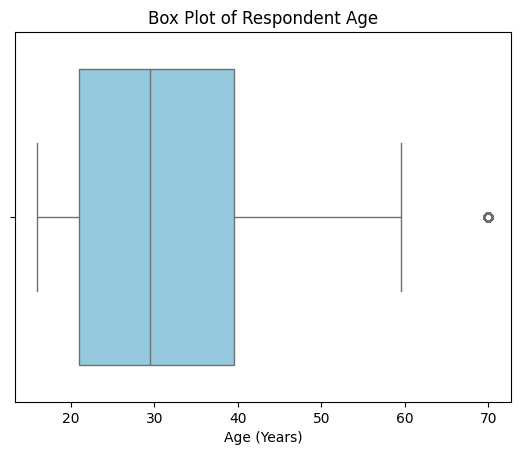

In [43]:
# Box plot
sns.boxplot(x=df['AgeNumeric'], color='skyblue')

plt.title('Box Plot of Respondent Age')
plt.xlabel('Age (Years)')
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [37]:
df['WorkExp'].unique()

array([nan, 17., 15., 12., 29., 10., 18., 16.,  6.,  7., 14.,  3.,  4.,
        8.,  1.,  9., 27., 31., 35., 25.,  5., 28., 26., 13., 30., 37.,
        2., 24., 20., 23., 19., 21., 11., 34., 32., 22.,  0., 33., 44.,
       40., 41., 36., 45., 39., 50., 38., 48., 42., 46., 43., 49., 47.])

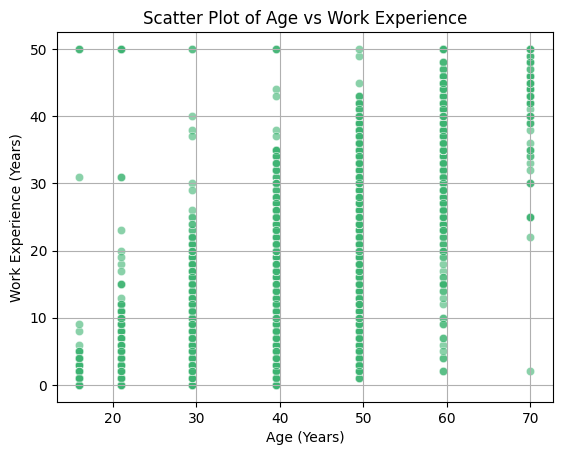

In [45]:
# Create scatter plot
sns.scatterplot(data=df, x='AgeNumeric', y='WorkExp', alpha=0.6, color='mediumseagreen')

plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age (Years)')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [47]:
df['TimeSearching'].unique()

array([nan, '30-60 minutes a day', '60-120 minutes a day',
       '15-30 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [49]:
df['Frustration'].unique()

array([nan,
       'Amount of technical debt;Number of software tools in use;Tracking my work;Showing my contributions',
       'Amount of technical debt;Complexity of tech stack for deployment',
       'Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build;Maintaining security of code being produced',
       'Amount of technical debt;Tracking my work;Complexity of tech stack for build;Patching/updating core components;Maintaining security of systems/platforms used in work;Reliability of tools/systems used in work',
       'Number of software tools in use;Tracking my work;Showing my contributions;Complexity of tech stack for build',
       'Amount of technical debt',
       'Amount of technical debt;Number of software tools in use',
       'None of these',
       'Amount of technical debt;Tracking my work;Showing my contributions;Complexity of tech stack for deployment',
       'Amount of technical debt;Complexity of tech stack for build',


In [51]:
# Map time ranges to approximate numeric values (in minutes)
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150,
}

# Apply mapping
df['TimeSearchingMinutes'] = df['TimeSearching'].map(time_mapping)

# Preview transformed values
df['TimeSearchingMinutes'].unique()

array([  nan,  45. ,  90. ,  22.5,  10. , 150. ])

In [57]:
# Define a function to count frustration factors
def count_frustration_items(value):
    if pd.isna(value) or value.strip() == 'None of these':
        return 0
    return len([item.strip() for item in value.split(';') if item.strip()])

# Apply the function to create a new column
df['FrustrationCount'] = df['Frustration'].apply(count_frustration_items)

# Preview the result
df['FrustrationCount'].unique()

array([ 0,  4,  2,  6,  1,  3,  5,  9,  7,  8, 10, 11])

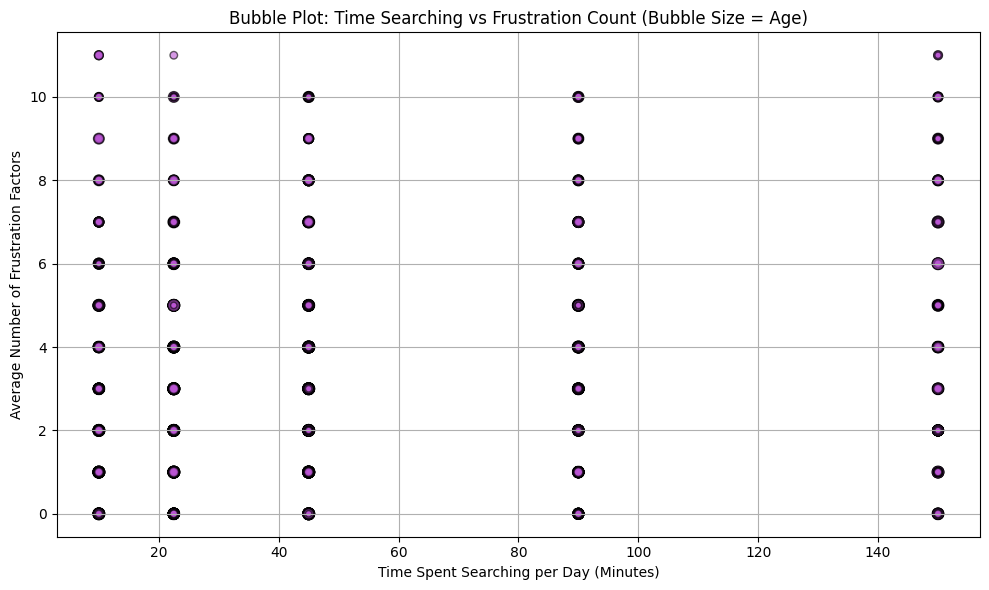

In [71]:
# Create bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df['TimeSearchingMinutes'],
    df['FrustrationCount'],
    df['AgeNumeric'],
    alpha=0.6,
    color='mediumorchid',
    edgecolors='black'
)

plt.xlabel('Time Spent Searching per Day (Minutes)')
plt.ylabel('Average Number of Frustration Factors')
plt.title('Bubble Plot: Time Searching vs Frustration Count (Bubble Size = Age)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [73]:
df['DatabaseWantToWorkWith'].unique()

array([nan, 'PostgreSQL', 'Firebase Realtime Database', ...,
       'Cassandra;Firebase Realtime Database;MariaDB;Microsoft Access;MongoDB;MySQL;PostgreSQL;Redis',
       'MySQL;Presto;TiDB',
       'BigQuery;Cassandra;Databricks SQL;DuckDB;Elasticsearch;Firebase Realtime Database;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;Redis;Snowflake;SQLite;Supabase'],
      dtype=object)

In [79]:
df.info()
df['DatabaseWantToWorkWith'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 118 entries, ResponseId to FrustrationCount
dtypes: float64(15), int64(2), object(101)
memory usage: 58.9+ MB


22879

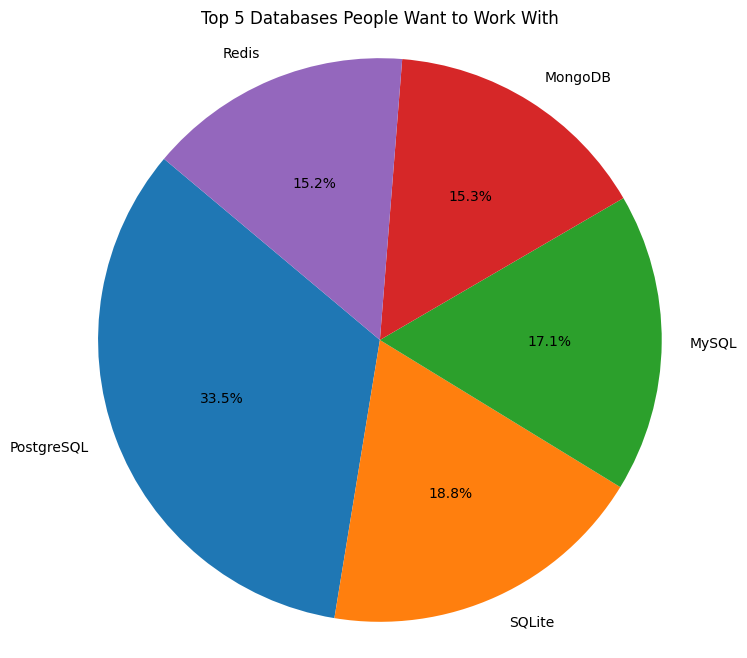

In [81]:
# Split and explode
db_series = df['DatabaseWantToWorkWith'].dropna().str.split(';')
all_dbs = pd.Series([db.strip() for sublist in db_series for db in sublist])

# Count frequencies
top_dbs = all_dbs.value_counts().head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_dbs, labels=top_dbs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases People Want to Work With')
plt.axis('equal')  # Equal aspect ratio makes the pie a circle
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [83]:
df['TimeAnswering'].unique()

array([nan, '60-120 minutes a day', '15-30 minutes a day',
       '30-60 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [85]:
df['TimeSearching'].unique()

array([nan, '30-60 minutes a day', '60-120 minutes a day',
       '15-30 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [87]:
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [89]:
# Map time ranges to approximate numeric values (in minutes)
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150,
}

# Apply mapping
df['TimeAnsweringMinutes'] = df['TimeAnswering'].map(time_mapping)

# Preview transformed values
df['TimeAnsweringMinutes'].unique()

array([  nan,  90. ,  22.5,  45. ,  10. , 150. ])

In [91]:
df['AgeNumeric'].unique()

array([16. , 39.5, 49.5, 21. , 29.5, 59.5,  nan, 70. ])

In [95]:
import numpy as np

# Filter data for AgeNumeric = 29.5
# Using a small tolerance to account for floating point precision
age_filter = np.isclose(df['AgeNumeric'], 29.5, atol=1e-10)
filtered_df = df[age_filter]

# Calculate the median times
median_searching = filtered_df['TimeSearchingMinutes'].median()
median_answering = filtered_df['TimeAnsweringMinutes'].median()
    
print(f"Median TimeSearchingMinutes: {median_searching}")
print(f"Median TimeAnsweringMinutes: {median_answering}")

Median TimeSearchingMinutes: 45.0
Median TimeAnsweringMinutes: 22.5


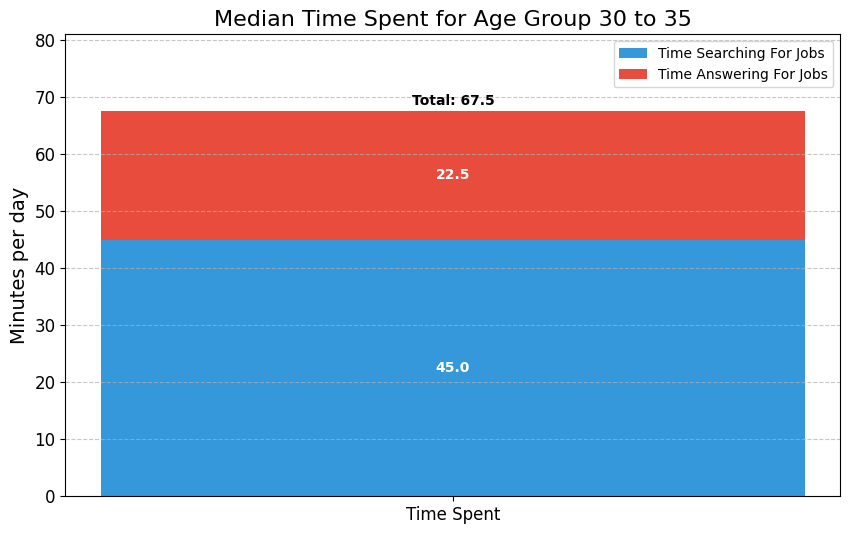

In [101]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['Time Spent'],
    'Searching': [median_searching],
    'Answering': [median_answering]
})

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
    
# Plot the stacked bar
bottom_bar = plt.bar(plot_data['Category'], plot_data['Searching'], 
    color='#3498db', label='Time Searching For Jobs')
    
top_bar = plt.bar(plot_data['Category'], plot_data['Answering'], 
    bottom=plot_data['Searching'], color='#e74c3c', 
    label='Time Answering For Jobs')
    
# Calculate total time for annotation
total_time = median_searching + median_answering
    
# Add annotations to the bars
plt.annotate(f'{median_searching:.1f}', 
    xy=(0, median_searching/2), 
    ha='center', va='center', color='white', fontweight='bold')
    
plt.annotate(f'{median_answering:.1f}', 
    xy=(0, median_searching + median_answering/2), 
    ha='center', va='center', color='white', fontweight='bold')
    
plt.annotate(f'Total: {total_time:.1f}', 
    xy=(0, total_time + 0.5), 
    ha='center', va='bottom', color='black', fontweight='bold')
    
# Add titles and labels
plt.title('Median Time Spent for Age Group 30 to 35', fontsize=16)
plt.ylabel('Minutes per day', fontsize=14)
plt.ylim(0, total_time * 1.2)  # Add some space for the total annotation
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
    
# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
    
# Add a legend
plt.legend(loc='upper right')

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [105]:
# age = 49.5 and 59.5
df['CompTotal'].unique()
df['CompTotal'].isnull().sum()

31697

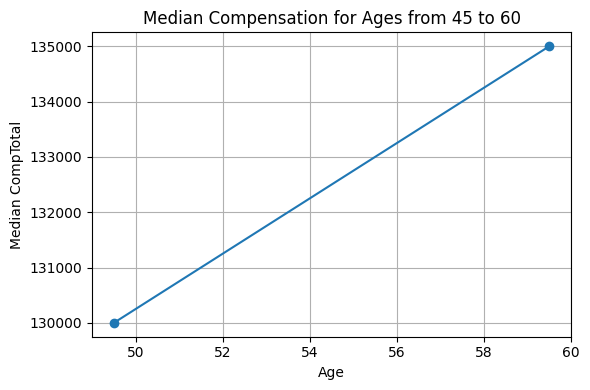

In [107]:
# Filter for ages 49.5 and 59.5
filtered_df = df[df['AgeNumeric'].isin([49.5, 59.5])]

# Group by age and calculate median compensation
median_comp = filtered_df.groupby('AgeNumeric')['CompTotal'].median()

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(median_comp.index, median_comp.values, marker='o', linestyle='-')
plt.title('Median Compensation for Ages from 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.grid(True)
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [115]:
df['MainBranch'].unique()

array(['I am a developer by profession', 'I am learning to code',
       'I code primarily as a hobby',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [117]:
df['MainBranch'].isnull().sum()

0

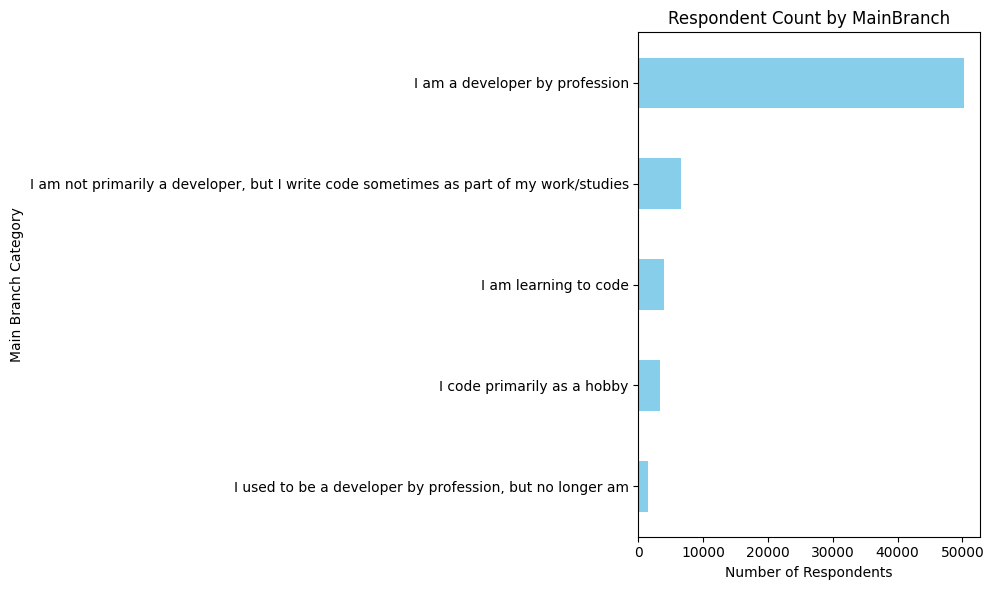

In [119]:
# Count occurrences of each category
main_branch_counts = df['MainBranch'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue')
plt.title('Respondent Count by MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch Category')
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [121]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
